In [70]:
#import necessary libraries
import numpy as np
#import the visulaisation library
import matplotlib.pyplot as plt 
#import the cmath package that has the complex numbers functions
import cmath
#import the random library to generate random noise
import random
#import the wavelet library
import pywt  
#import pandas
import pandas as pd
#import scipy
import scipy

In [71]:
#import data
Data1 = pd.read_csv('Recording_1.csv')
data = pd.read_csv('Recording_2.csv')
print(data.shape)
t = data.iloc[:,0]
A = data.iloc[:,1]

(480, 2)


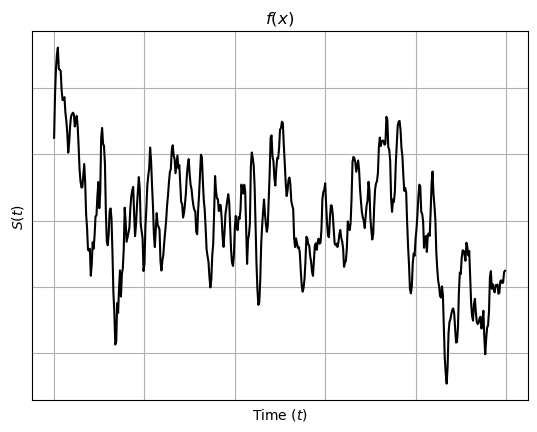

In [72]:
plt.plot(t,A,c='k')
plt.xlabel('Time $(t)$') 
plt.ylabel('$S(t)$')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title('$f(x)$')
plt.grid() 

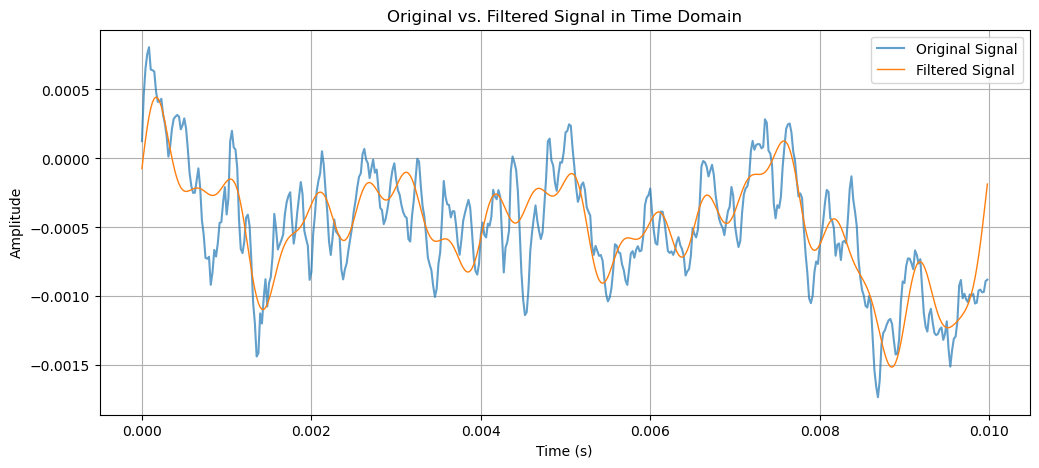

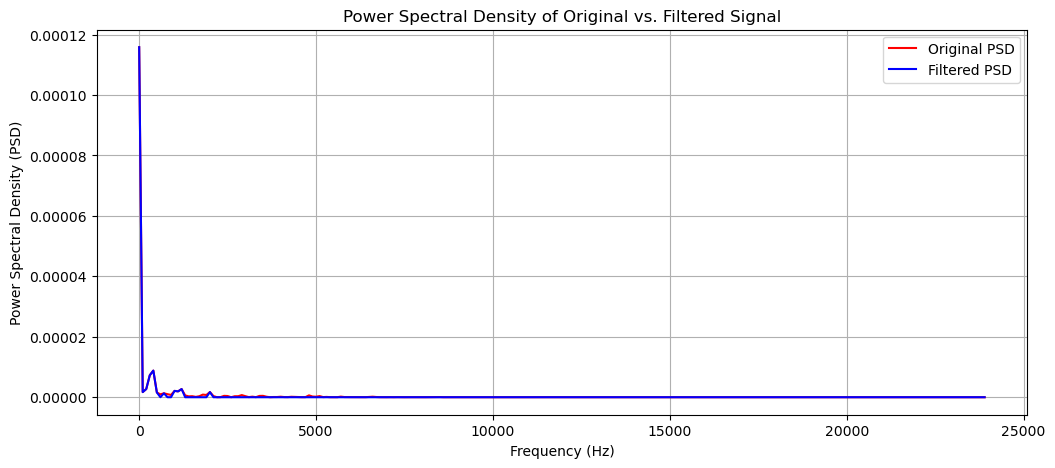

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Extract time and amplitude values
time = data.iloc[:, 0].values / 1000  # Convert milliseconds to seconds
amplitude = data.iloc[:, 1].values

# Compute FFT
n = len(time)
dt = np.mean(np.diff(time))  # Time step
fhat = np.fft.fft(amplitude)  # Compute FFT
freqs = np.fft.fftfreq(n, dt)  # Frequency axis

# Compute Power Spectral Density (PSD)
PSD = (fhat * np.conjugate(fhat)) / n

# Set threshold for filtering (adjustable)
threshold = np.max(PSD) * 0.01  # Keep % of max power

# Filter the signal
indices = PSD > threshold  # Identify frequencies to keep
fhat_filtered = fhat * indices  # Zero out unwanted frequencies

# Convert back to time domain
filtered_amplitude = np.fft.ifft(fhat_filtered).real

# Plot original vs filtered signal in time domain
plt.figure(figsize=(12, 5))
plt.plot(time, amplitude, label="Original Signal", alpha=0.7)
plt.plot(time, filtered_amplitude, label="Filtered Signal", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Original vs. Filtered Signal in Time Domain")
plt.grid()
plt.show()

# Plot PSD of original and filtered signals
plt.figure(figsize=(12, 5))
plt.plot(freqs[:n // 2], PSD[:n // 2].real, 'r', label="Original PSD")
plt.plot(freqs[:n // 2], (fhat_filtered * np.conjugate(fhat_filtered) / n)[:n // 2].real, 'b', label="Filtered PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (PSD)")
plt.legend()
plt.title("Power Spectral Density of Original vs. Filtered Signal")
plt.grid()
plt.show()


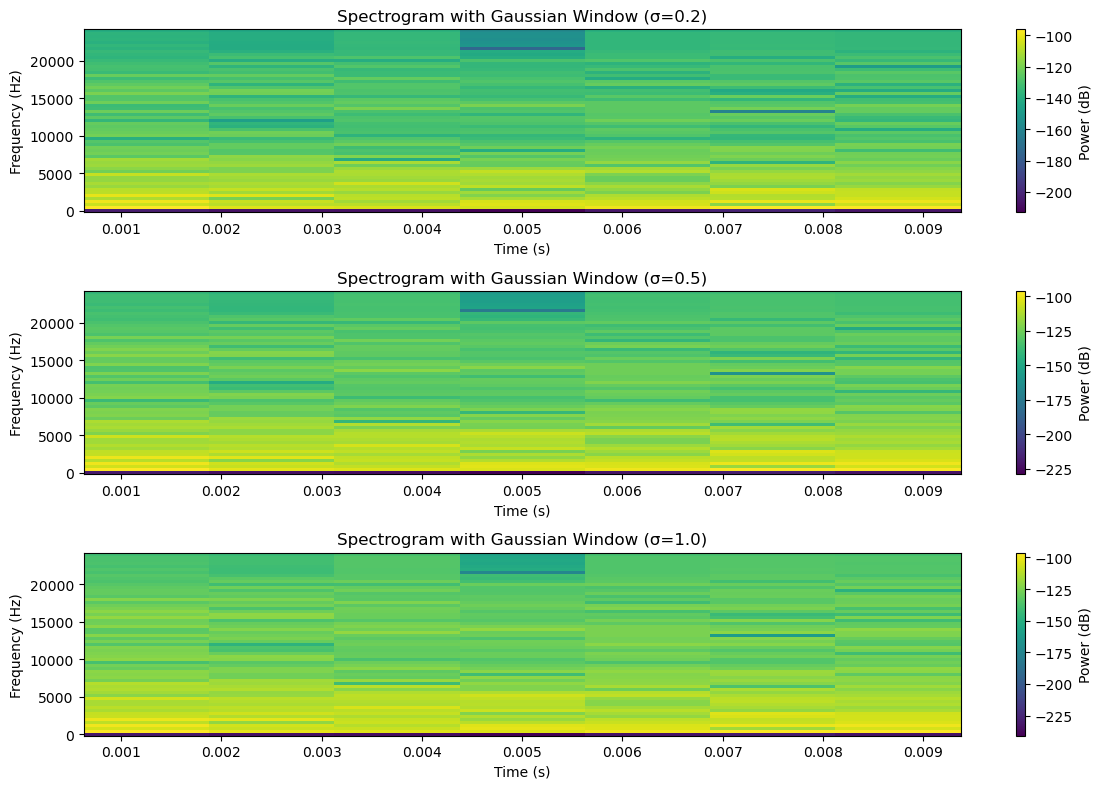

In [74]:
# Recalculate the sampling frequency (fs)
fs = 1 / dt  # Sampling frequency based on time step

# Set the maximum window length based on the signal length
max_window_length = 480 // 4  # Ensuring the window is at most 1/4 of the total length

plt.figure(figsize=(12, 8))

for i, sigma in enumerate(sigma_values, 1):
    # Compute an appropriate window length
    window_length = min(int(8 * sigma * fs), max_window_length)
    if window_length < 2:
        window_length = 2  # Ensure a minimum valid window length

    # Create Gaussian window
    gaussian_window = scipy.signal.windows.gaussian(window_length, std=sigma * fs)

    # Compute spectrogram
    f, t, Sxx = scipy.signal.spectrogram(amplitude, fs, window=gaussian_window, nperseg=window_length, noverlap=window_length // 2)

    # Plot spectrogram
    plt.subplot(3, 1, i)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title(f'Spectrogram with Gaussian Window (σ={sigma})')
    plt.colorbar(label='Power (dB)')

plt.tight_layout()
plt.show()


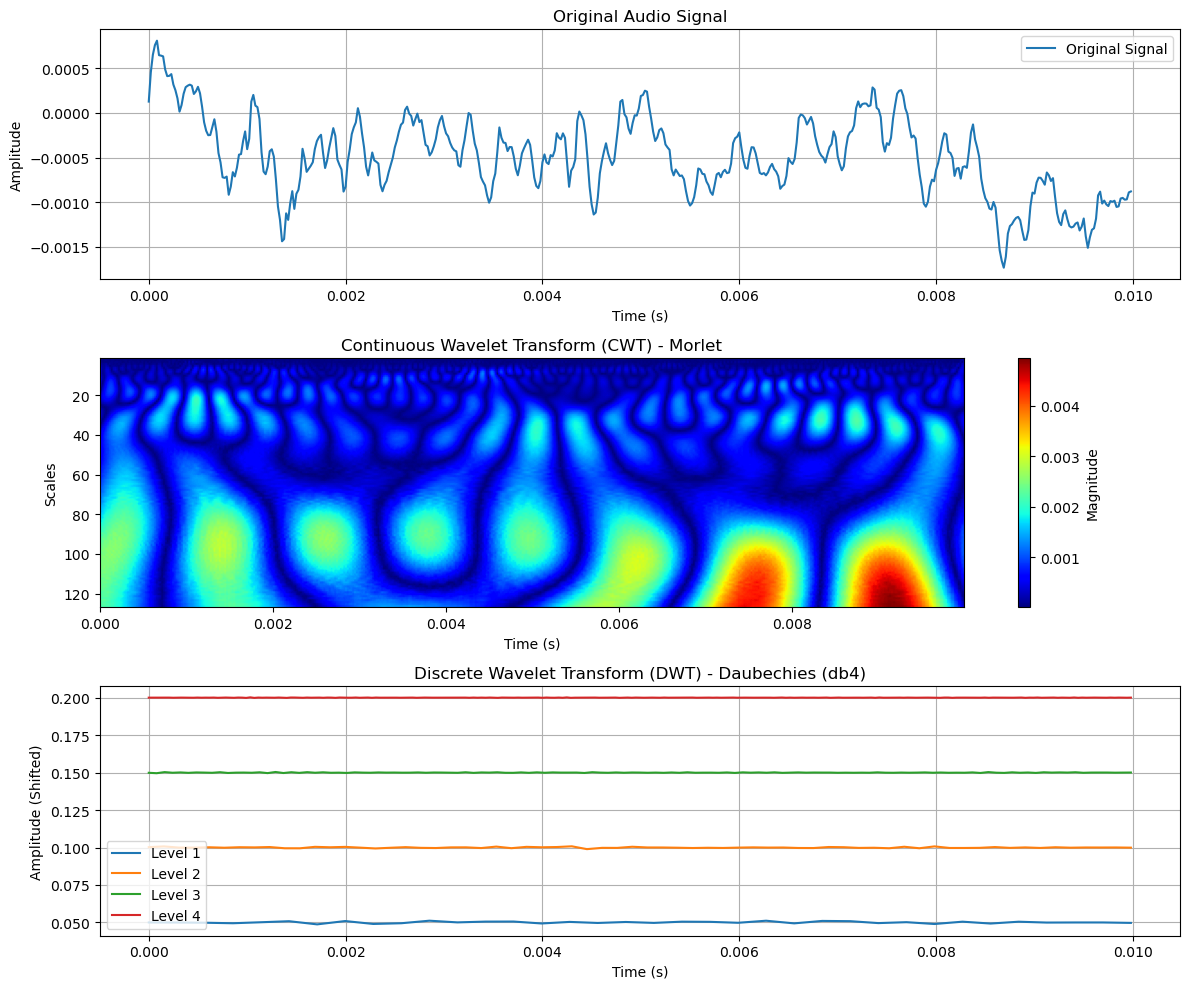

In [75]:
import pywt

# Define wavelet parameters
scales = np.arange(1, 128)  # Define scale range for continuous wavelet transform

# Continuous Wavelet Transform (CWT) using Morlet wavelet
coefficients_cwt, frequencies_cwt = pywt.cwt(amplitude, scales, 'morl', sampling_period=dt)

# Discrete Wavelet Transform (DWT) using Daubechies wavelet (db4)
coefficients_dwt = pywt.wavedec(amplitude, 'db4', level=4)

# Plot Original Signal
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(time, amplitude, label="Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Audio Signal")
plt.legend()
plt.grid()

# Plot Continuous Wavelet Scaleogram
plt.subplot(3, 1, 2)
plt.imshow(np.abs(coefficients_cwt), aspect='auto', extent=[time[0], time[-1], scales[-1], scales[0]], cmap='jet')
plt.colorbar(label="Magnitude")
plt.xlabel("Time (s)")
plt.ylabel("Scales")
plt.title("Continuous Wavelet Transform (CWT) - Morlet")

# Plot Discrete Wavelet Scaleogram
plt.subplot(3, 1, 3)
for i, coeff in enumerate(coefficients_dwt[1:], 1):
    plt.plot(np.linspace(time[0], time[-1], len(coeff)), coeff + i * 0.05, label=f"Level {i}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude (Shifted)")
plt.title("Discrete Wavelet Transform (DWT) - Daubechies (db4)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
